<a href="https://colab.research.google.com/github/Preeyam1/project1/blob/master/HR_ATTRITION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import *
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data=pd.read_csv('HR_Employee_Attrition_Data.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

# Insights -

### This provides information about the dataset, including the number of non-null values in each column. By observing the output and finding zero null values, we can conclude that the dataset is complete and does not contain any missing values, ensuring the integrity of the data for analysis.

#### Insights - There are 26 variables in the dataset that have integer values and 9 variable have string variable.


In [ ]:
data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
data.EmployeeCount.values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [ ]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,-0.004892,0.497855,0.028051,0.299635,0.003634,0.053535,0.037510,-0.019621,-0.021490,0.311309,0.216513
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.030571,0.007707,-0.032182,0.038153,0.022704,0.007846,0.042143,0.002453,-0.037848,-0.034055,-0.033229
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.006557,0.044872,-0.036942,-0.026556,0.009508,0.010029
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.009118,0.018422,-0.025100,0.009819,0.069114,0.054254
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,-0.006784,-0.006259,0.037600,0.012594,-0.031701,0.007665,0.003432,-0.019359,0.027627,0.001458,0.016194
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,0.001330,0.050263,-0.008548,-0.004607,-0.019582,-0.026716
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,0.034297,0.021523,-0.015338,-0.014617,-0.021355,-0.024184
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,1.000000,-0.007157,0.000644,-0.055699,0.020002,-0.012454,0.010690,-0.005779,-0.019459,-0.003803,-0.018214
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,-0.007157,1.000000,0.034814,0.149515,-0.027269,0.025873,0.005408,-0.021736,0.030683,0.514285,0.344978
MonthlyRate,0.028051,-0.032182,0.027473,-0.026084,0.037600,-0.015297,-0.016322,0.000644,0.034814,1.000000,0.017521,-0.006429,-0.004085,-0.034323,0.001467,0.007963,-0.023655,0.001567


# Insights - 

### This is the pairwise correlation between the columns of a dataset. It provides insights into the strength and direction of the linear relationship between variables. By examining the correlation values, we can identify potential associations or dependencies between different features in the data.

In [ ]:
del data['Over18']
data=data.drop('EmployeeNumber',axis=1)
data=data.drop('EmployeeCount',axis=1)
del data['StandardHours']
data=data.drop('YearsInCurrentRole',axis=1)
data=data.drop('YearsWithCurrManager',axis=1)
data=data.drop('JobLevel',axis=1)
data=data.drop('TotalWorkingYears',axis=1)
data=data.drop('PerformanceRating',axis=1)

# Insights - 
### In this code, certain columns with zero variance and high correlation were removed from the dataset. This helps to eliminate redundant or uninformative features, leading to a more focused and concise dataset for analysis.

In [ ]:
data.shape

(2940, 26)

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.728571,6502.931293,14313.103401,2.693197,15.209524,2.712245,0.793878,2.799320,2.761224,7.008163,2.187755
std,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.102658,4707.155770,7116.575021,2.497584,3.659315,1.081025,0.851932,1.289051,0.706356,6.125483,3.221882
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,2.000000,0.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,1.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,4.000000,1.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,3.000000,6.000000,4.000000,40.000000,15.000000


# Insights - 

### This summary of descriptive statistics for numerical columns in the dataset. It includes key statistics such as count, mean, standard deviation, minimum, quartiles, and maximum values. This summary helps to gain an overview of the central tendencies, dispersion, and range of the dataset, facilitating initial data exploration and understanding.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

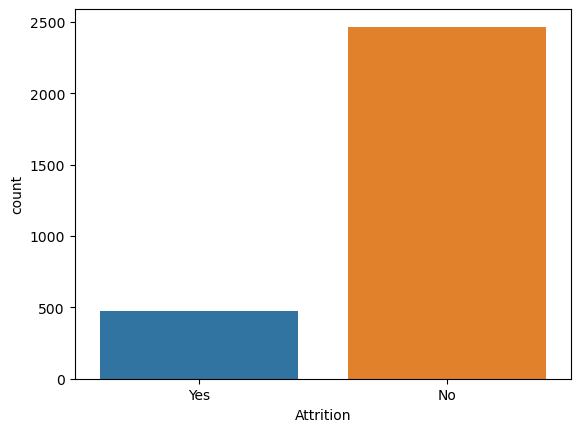

In [ ]:
sns.countplot(x='Attrition',data=data)

### Insight - 

### In this analysis, the attrition percentage is approx 20% in our dataset.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

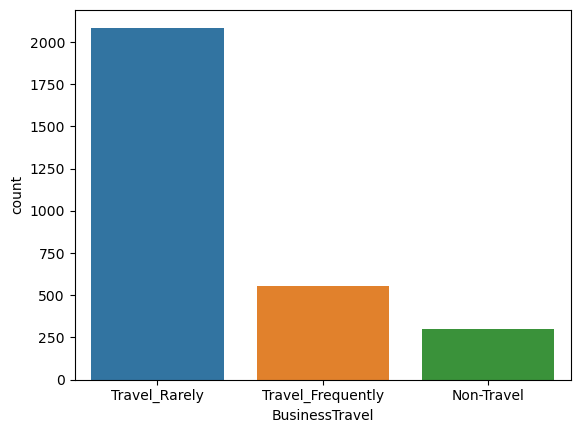

In [ ]:
sns.countplot(x='BusinessTravel',data=data)

# Insights - 

###  The majority of employees fall into the "Travel Rarely" category of business travel, with approximately 2100 employees. This suggests that most employees do not frequently travel for business purposes.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

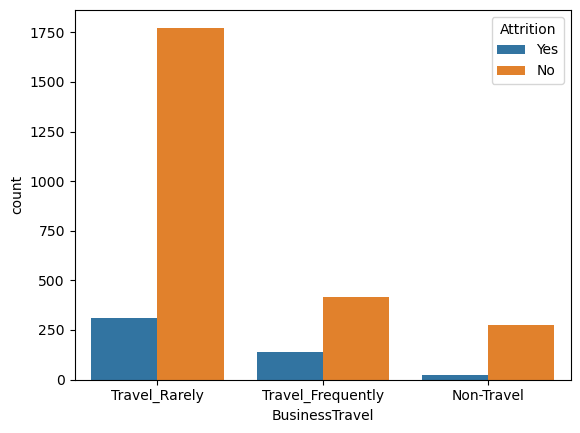

In [ ]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=data)

### Insight - 
### In the analysis of employee attrition, when examining the relationship between business travel and attrition, it is observed that individuals who travel rarely, has attrition approximately upto 300.

<AxesSubplot:xlabel='Department', ylabel='count'>

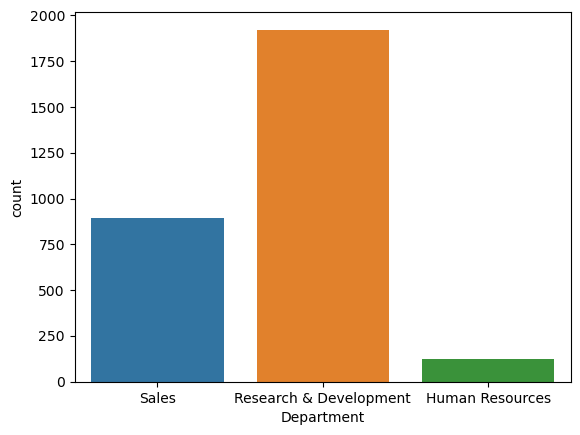

In [ ]:
sns.countplot(x='Department',data=data)

# Insights - 

### The analysis shows that the R&D department has the highest number of employees, with approximately 1900 employees, followed by the sales department. On the other hand, the HR department has the fewest employees among the departments considered.

<AxesSubplot:xlabel='Department', ylabel='count'>

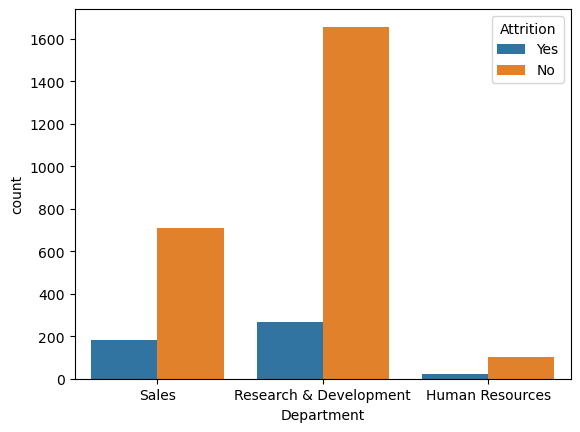

In [ ]:
sns.countplot(x='Department',hue='Attrition',data=data)

### Insight - 
### From this analysis it is found that the R & D department has the high attrition count followed by sales department and the HR department has the lowest attrition count. On the other hand the highest retention count is also from the R & D department.

<AxesSubplot:xlabel='EducationField', ylabel='count'>

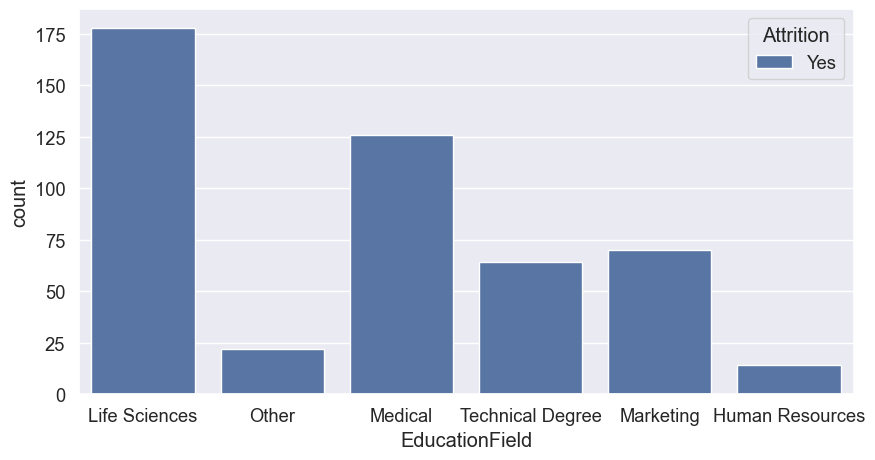

In [ ]:
plt.subplots(figsize=(10, 5))
attr_edu=data[data['Attrition']=='Yes']
sns.countplot(x='EducationField',hue='Attrition',data=attr_edu)


# Insights - 
#### Upon analyzing the attrition data, It was observed that individuals with a background in the Life Sciences field exhibited the highest attrition count, followed by those in the Medical field. And employees from the Human Resources field demonstrated the lowest attrition count.  Understanding and addressing these factors could be pivotal in developing effective retention strategies and fostering a more resilient workforce within these fields.

<AxesSubplot:xlabel='Education', ylabel='count'>

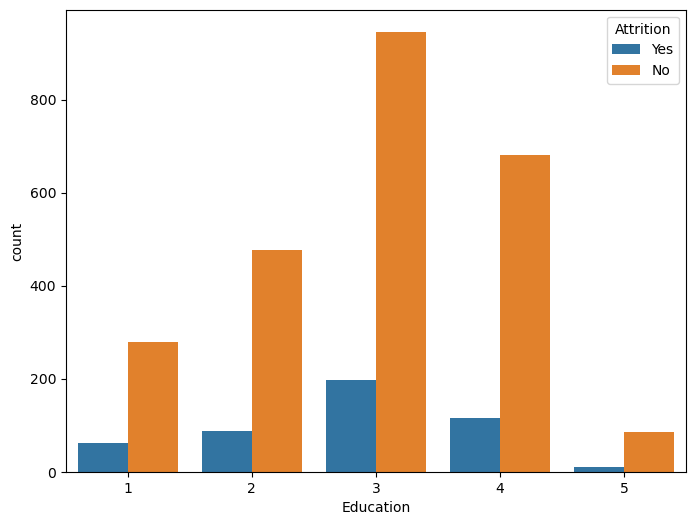

In [ ]:
plt.subplots(figsize=(8, 6))
sns.countplot(x='Education',hue='Attrition',data=data)


<AxesSubplot:xlabel='Gender', ylabel='count'>

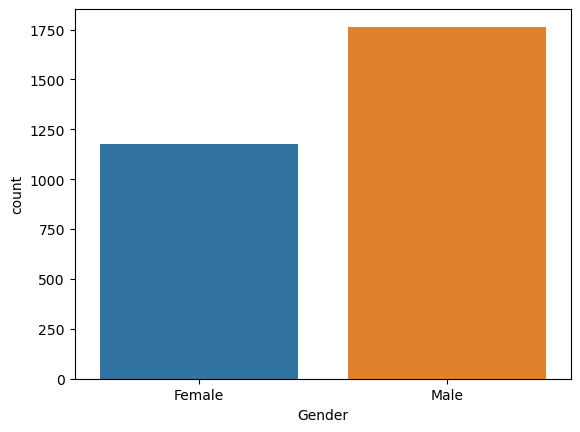

In [ ]:
sns.countplot(x='Gender',data=data)

# Insights -

### The number of male employees is higher, with approximately 1750 male employees compared to female employees. This indicates that there is a difference of approximately 31.4% in the count of female employees compared to male employees.

<AxesSubplot:xlabel='Gender', ylabel='count'>

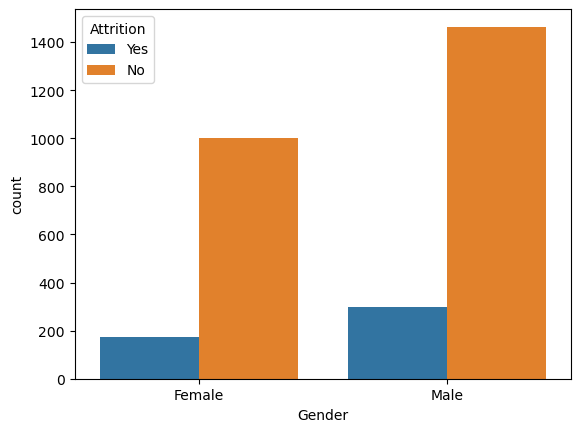

In [ ]:
sns.countplot(x='Gender',hue='Attrition',data=data)

# Insight 
####  The analysis of employee attrition based on gender. It is observed that male employees exhibited a higher attrition count compared to the female counterparts. Understanding and addressing these factors could play a crucial role in mitigating attrition and fostering a more inclusive and supportive work environment for all employees. 

<AxesSubplot:xlabel='Department', ylabel='count'>

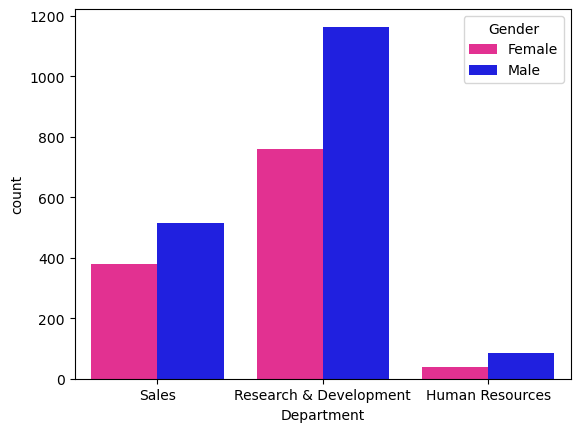

In [ ]:
sns.countplot(x='Department',hue='Gender',data=data,palette={"Male": "blue", "Female": "deeppink"})

# Insight - 
### Based on the analysis of the dataset, it is observed that in the "Research and Development" department, both male and female employees has the highest count. Furthermore, across all departments, the count of male employees was generally higher than that of female employees. 

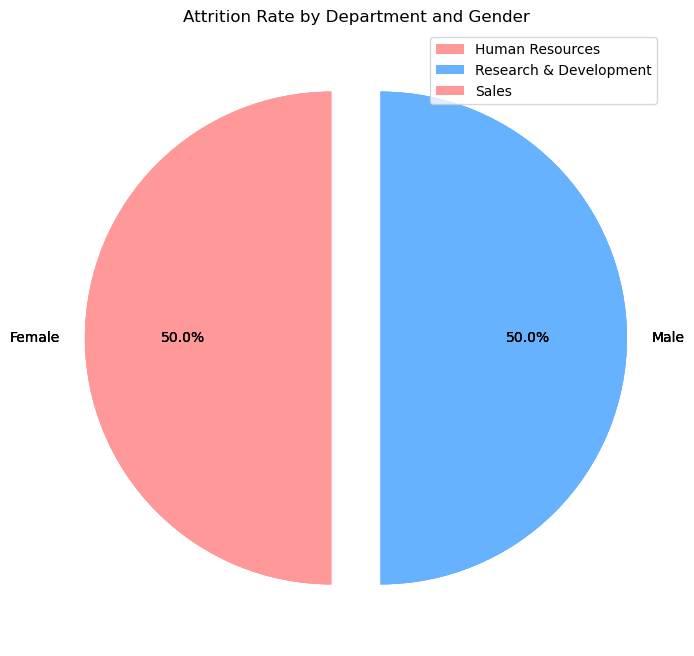

In [ ]:
attrition_count = data[data['Attrition'] == 'Yes'].groupby(['Department', 'Gender']).size().reset_index(name='Count')
attrition_percentage = attrition_count.groupby(['Department', 'Gender']).apply(lambda x: x['Count'] / x['Count'].sum() * 100).reset_index(name='Percentage')

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Choose colors for each department

for i, department in enumerate(attrition_percentage['Department'].unique()):
    gender_data = attrition_percentage[attrition_percentage['Department'] == department]
    labels = gender_data['Gender']
    percentages = gender_data['Percentage']
    explode = [0.1] * len(labels)  # Create an explode array for better visualization

    ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors[:len(labels)], explode=explode)
    ax.set_title("Attrition Rate by Department and Gender")

plt.legend(attrition_percentage['Department'].unique())
plt.show()

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

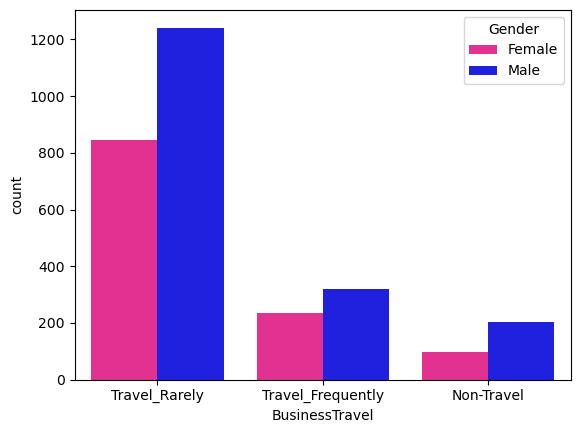

In [ ]:
sns.countplot(x='BusinessTravel',hue='Gender',data=data,palette={"Male": "blue", "Female": "deeppink"})

# Insights - 

### The male gender exhibits a higher count compared to the female gender. Furthermore, it is noteworthy that a major portion of both males and females falls under the "Travel Rarely" category, indicating a common trend of infrequent travel among employees. These findings highlight the gender distribution and travel patterns within the organization, providing valuable insights for workforce planning and travel management strategies.

<AxesSubplot:xlabel='Department', ylabel='count'>

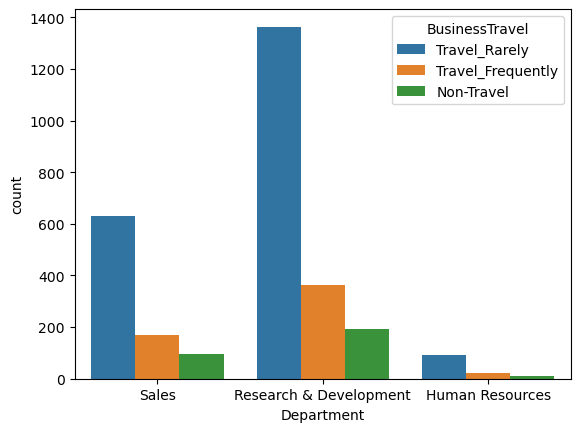

In [ ]:
sns.countplot(x='Department',hue='BusinessTravel',data=data)

# Insights - 

### The Research & Development (R&D) department exhibits the highest count across all travel categories, followed by the Sales department. This insight highlights the prominence of the R&D department in terms of travel requirements, indicating its significance in research and project-related activities. The Sales department, although lower in count, demonstrates a notable presence in travel engagements, suggesting its involvement in client meetings and business development activities. And the HR department indicating a infrequent travel among employees.

In [ ]:
attrition = data[data['Attrition'] == 'Yes']

# calculate the percentage of attrition for each department
dept_attrition = attrition.groupby('Department')['Attrition'].count() / data.groupby('Department')['Attrition'].count() * 100

# calculate the percentage of attrition for each business travel type
travel_attrition = attrition.groupby('BusinessTravel')['Attrition'].count() / data.groupby('BusinessTravel')['Attrition'].count() * 100

print(dept_attrition)
print(travel_attrition)

Department
Human Resources           19.047619
Research & Development    13.839750
Sales                     20.627803
Name: Attrition, dtype: float64
BusinessTravel
Non-Travel            8.000000
Travel_Frequently    24.909747
Travel_Rarely        14.956855
Name: Attrition, dtype: float64


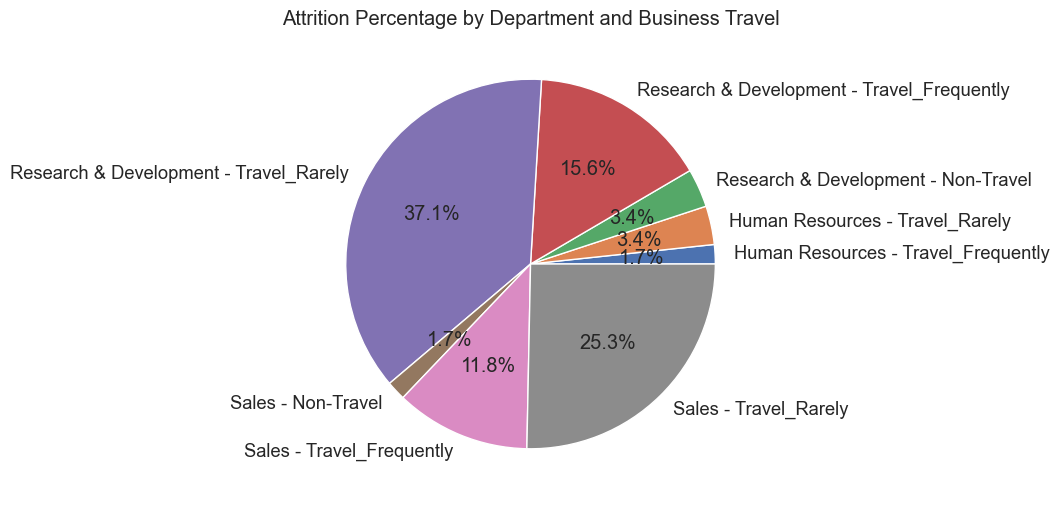

In [ ]:
grouped_data = attrition_data.groupby(['Department', 'BusinessTravel']).size().reset_index(name='count')

# Plot a pie chart to show the percentage distribution of attrition by Department and BusinessTravel
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set(font_scale=1.2)
plt.title("Attrition Percentage by Department and Business Travel")
plt.pie(grouped_data['count'], labels=grouped_data['Department'] + ' - ' + grouped_data['BusinessTravel'], autopct='%1.1f%%')
plt.show()

# Insights - 

###  The Research & Development (R&D) department with the "Travel Rarely" category stands out with the highest attrition rate of 37.1%. Following closely, the Sales department with the same travel category exhibits a significant attrition rate of 25.3%. On the other hand, the HR department, along with Sales and R&D departments in the "Non-Travel" category, demonstrates the lowest attrition rates. This information highlights the varying impact of travel frequency on attrition within different departments, emphasizing the need for targeted retention strategies and potential areas for improvement.

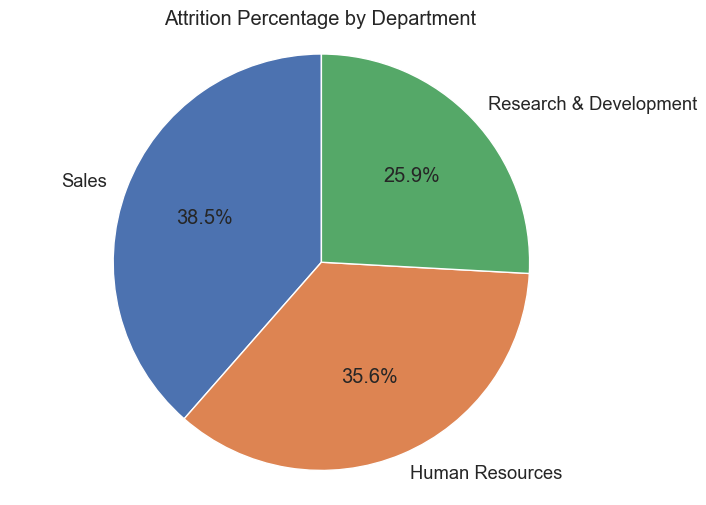

In [ ]:
# Calculate the percentage of attrition for each department
dept_attr = (attrition_data.groupby('Department')['Attrition'].count() / data.groupby('Department')['Attrition'].count()) * 100

# Sort the percentages in descending order
dept_attr_per = dept_attr.sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(dept_attr_per, labels=dept_attr_per.index, autopct='%1.1f%%', startangle=90)
plt.title("Attrition Percentage by Department")
plt.axis('equal')
plt.show()

# Insights - 

### The Sales department exhibits the highest attrition percentage at 38.5%, indicating potential challenges in employee retention within that department. Following closely, the HR department experiences a notable attrition rate of 35.6%. These findings emphasize the need for targeted strategies and interventions to address attrition concerns in these departments, fostering a more stable and engaged workforce.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

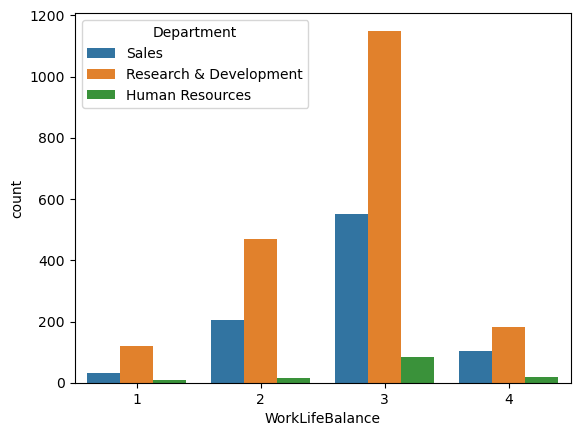

In [ ]:
sns.countplot(x='WorkLifeBalance',hue='Department',data=data)

# Insights -

### The analysis of work-life balance ratings across departments reveals that the R&D department consistently receives the highest rating of 3, indicating a favorable work-life balance. The Sales department closely follows with a significant number of employees also rating their work-life balance as 3. 

<AxesSubplot:xlabel='EducationField', ylabel='count'>

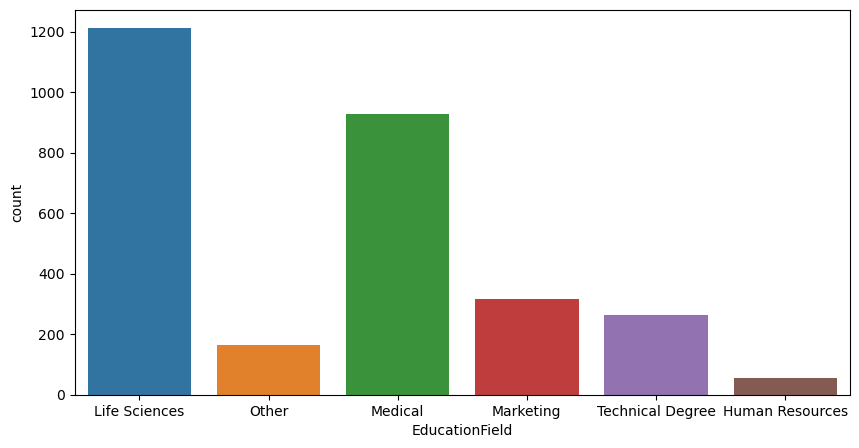

In [ ]:
plt.subplots(figsize=(10,5))
sns.countplot(x='EducationField',data=data)

# Insights -

### The analysis shows that the Life Sciences education field dominates the organization's employee composition. Following closely is the Medical field, indicating a substantial presence within the workforce. On the other hand the HR field exhibits the lowest count, representing a least proportion. This insight showcases the distribution of employees across different education fields.

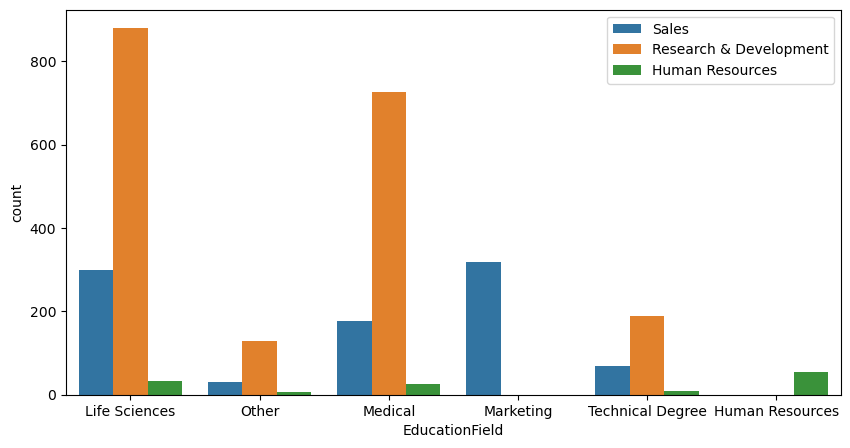

In [ ]:
plt.subplots(figsize=(10,5))
sns.countplot(x='EducationField',hue='Department',data=data)
plt.legend(loc='upper right')

# Insights - 

### The R&D Department majorly consists of employees with a background in Life Sciences, followed by those from the Medical field. In contrast, the Sales Department is primarily composed of individuals with a Marketing education background, although there are some employees with Life Sciences and Medical education fields as well. These findings suggest a clear alignment between the educational backgrounds of employees and the departments. This insights provide the alingment of the different education fields into proper department.

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

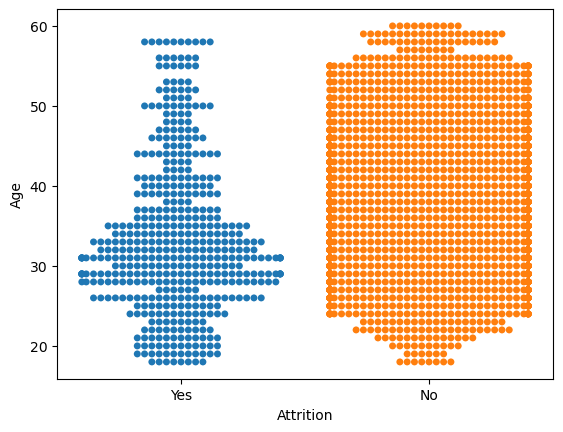

In [ ]:
sns.swarmplot(x='Attrition', y='Age', data=data)

# Insights - 

### The majority of attrition occurs within the age group of 25-35, indicating that employees in this age range are more likely to leave the company.  It's important to think about carrer growth, worklife balance, job satisfaction, by paying attention to these things, we can try to keep these employees from attrition.

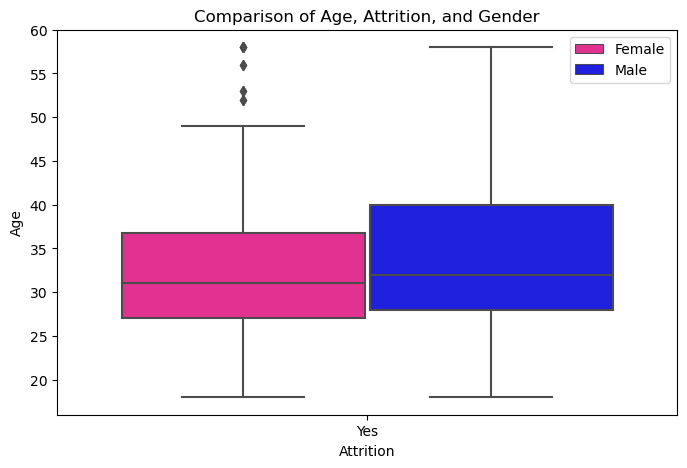

In [ ]:
plt.subplots(figsize=(8,5))
attr_gen = data[data['Attrition'] == 'Yes']
sns.boxplot(x='Attrition', y='Age', hue='Gender', data=attr_gen,palette={"Male": "blue", "Female": "deeppink"})
plt.title('Comparison of Age, Attrition, and Gender')
plt.legend(loc='upper right')
plt.show()

# Insights - 

### Male employees who left the company were primarily in the age range of 26 to 40. Similarly, female employees who left were mostly between the ages of 26 and 36, with some outliers in the age range of 51 to 58. These findings highlight the need to address specific factors influencing attrition among employees of different genders and age groups to improve retention strategies and create a more inclusive and supportive work environment.

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

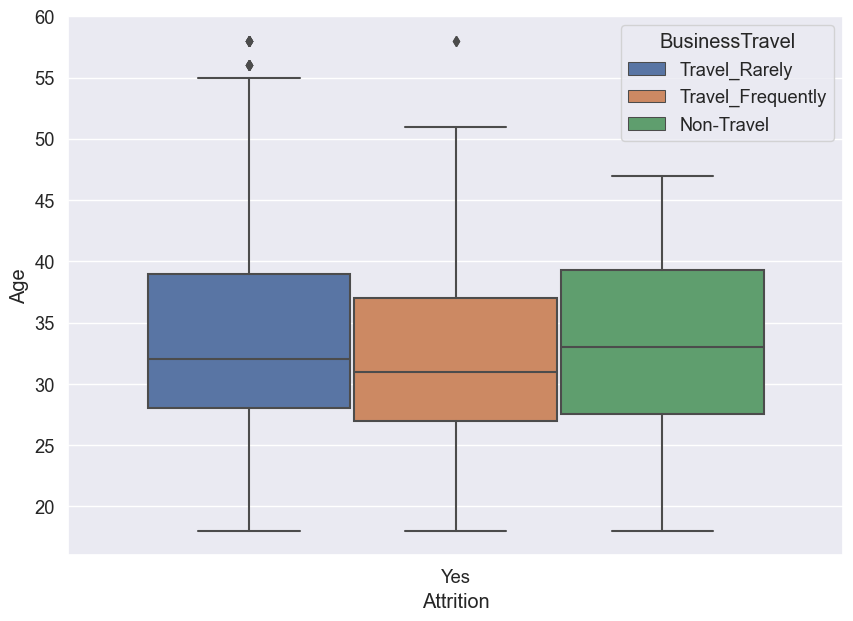

In [ ]:
plt.subplots(figsize=(10,7))
attr_tra = data[data['Attrition'] == 'Yes']
sns.boxplot (x='Attrition', y='Age', hue='BusinessTravel', data=attr_tra)

# Insights - 

### Employees who frequently travel experience attrition between the ages of 26 and 36. Similarly, employees who rarely travel have attrition between the ages of 27 and 38. Overall, the age group with the highest attrition rate across all travel categories is between 25 and 40. 

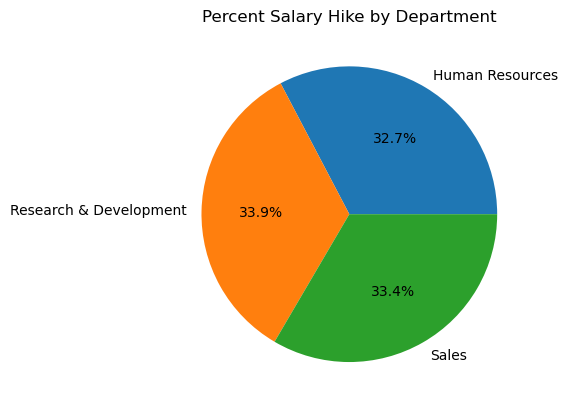

In [ ]:
dept_salary = data.groupby('Department')['PercentSalaryHike'].mean()

# Create a pie chart
plt.pie(dept_salary, labels=dept_salary.index, autopct='%1.1f%%')

#Set title of the chart
plt.title('Percent Salary Hike by Department')

# Show the plot
plt.show()

#Insights - 

### The R & D department has the highest average salary hike at 33.9%, followed closely by the sales department with 33.4%. This insight highlights the competitive salary growth within these departments and emphasize the importance of considering salary incentives when attracting and retaining talent.

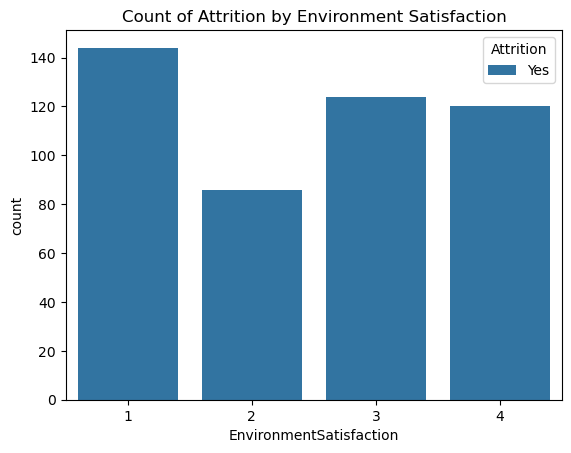

In [ ]:
attr_data = data[data['Attrition'] == 'Yes']
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=attr_data)
plt.title('Count of Attrition by Environment Satisfaction')
plt.show()

<AxesSubplot:xlabel='OverTime', ylabel='count'>

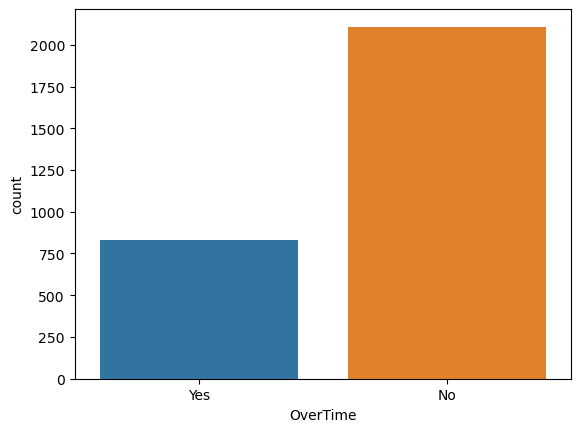

In [ ]:
sns.countplot(x='OverTime',data=data)

# Insights -

### The analysis reveals that a majority of employees in the organization do not engage in overtime work. In fact, the count of employees who do overtime is less than 50% of those who do not. This insight highlights the prevalent trend of employees prioritizing a standard work schedule without additional overtime hours.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

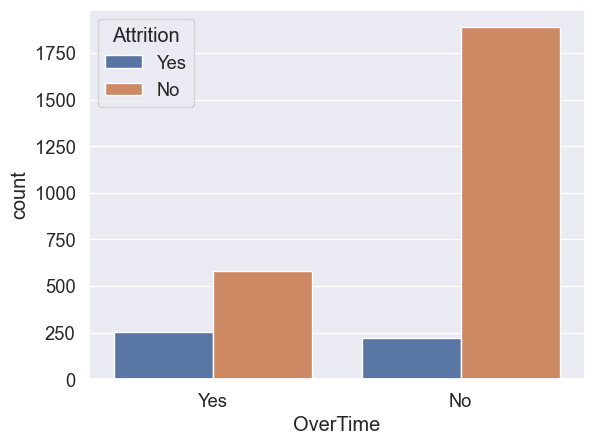

In [ ]:
sns.countplot(x='OverTime',hue='Attrition',data=data)

# Insights - 

### In this analysis, it was observed that employees who work overtime have a higher count of attrition, while employees who do not work overtime have a higher count of retention. This suggests a correlation between overtime work and attrition rates.

<AxesSubplot:xlabel='OverTime', ylabel='Age'>

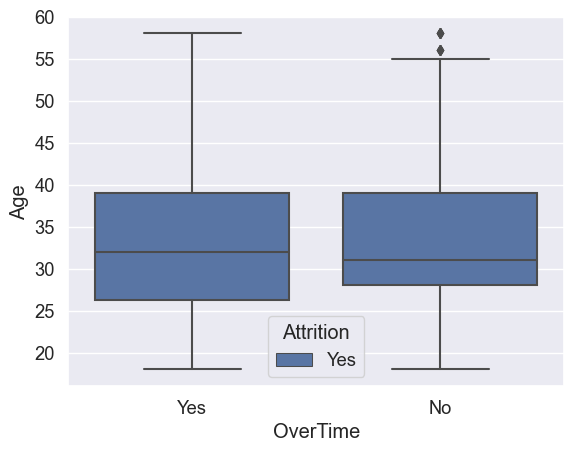

In [ ]:
attr_yes=data[data['Attrition']=='Yes']
sns.boxplot(y='Age',x='OverTime',hue='Attrition',data=attr_yes)

# Insights -

### When considering both employees who work overtime and those who don't, the age group between 25-40 shows the high attrition rate. This indicates that age plays a significant role in attrition, irrespective of overtime status.

<AxesSubplot:xlabel='JobRole', ylabel='count'>

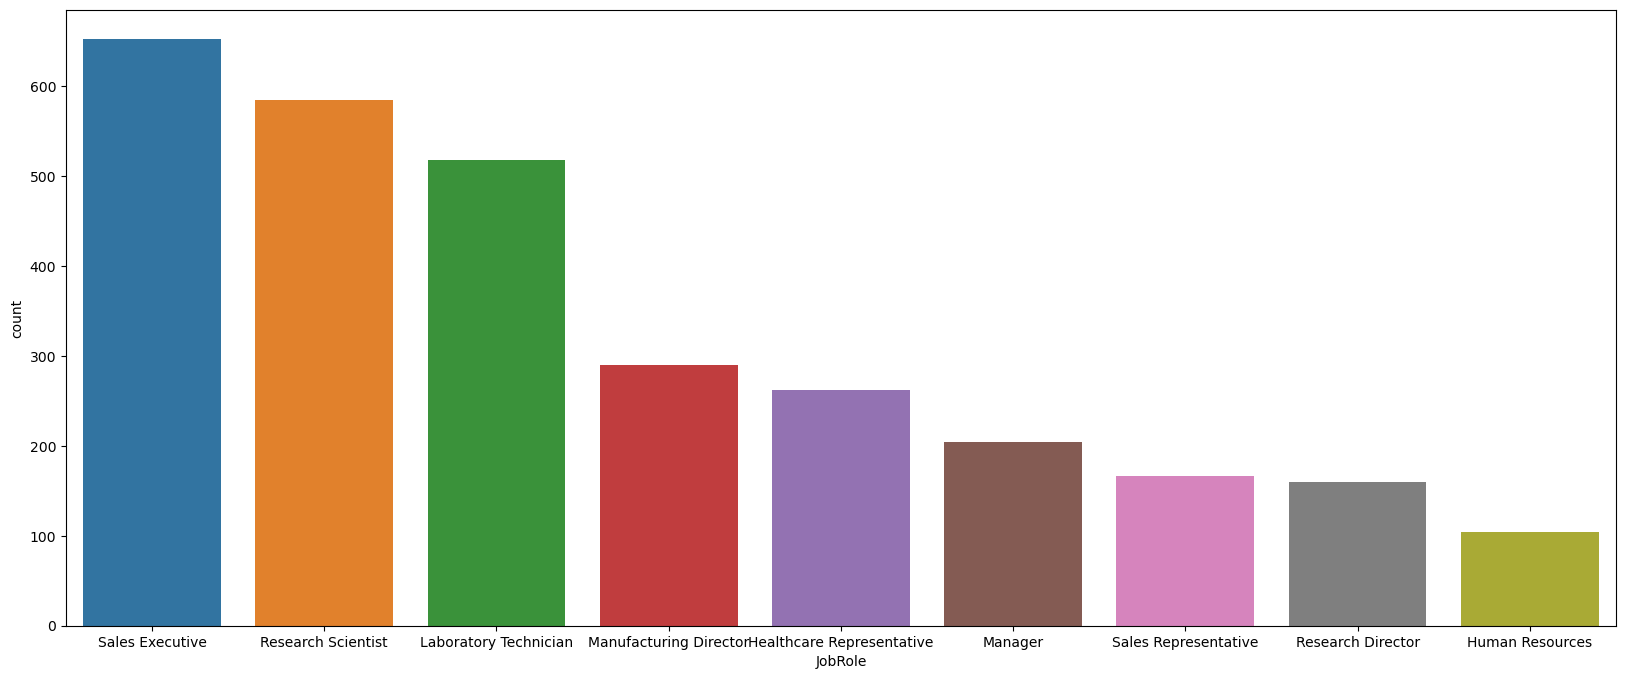

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(x='JobRole',data=data)

# Insights -

### The analysis highlights that the job role of sales executive has the highest number of employees within the organization followed by the research scientist role while the HR job role has the least representation. This insight emphasizes the distribution of employees across different job roles within the company.

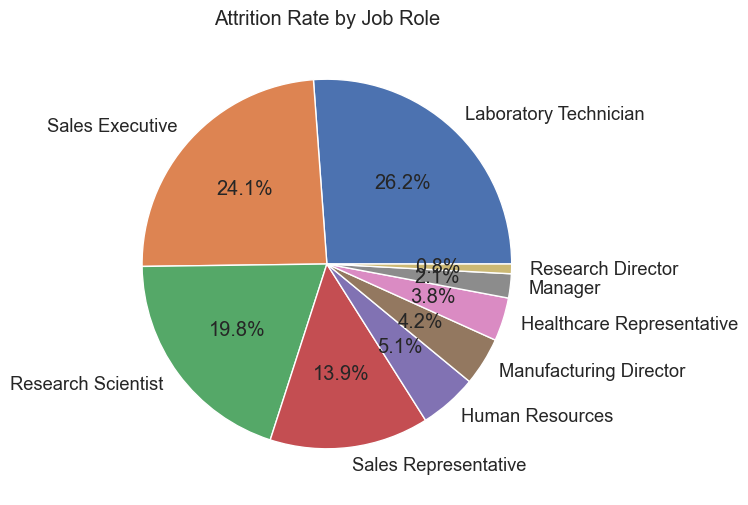

In [ ]:
attr_jobrole=data[data['Attrition']=='Yes']
job_counts = attr_jobrole['JobRole'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%')
plt.title('Attrition Rate by Job Role')
plt.show()


# Insights - 

### The job role of Laboratory Technician exhibits the highest attrition rate at 26.2%, followed by Sales Executive at 24.2%. On the other hand, Research Director shows the lowest attrition rate, while other roles such as Manager, Healthcare Representative, and Manufacturing Director also experience relatively lower attrition.This shows some job position require attention for retention of the employees. 

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

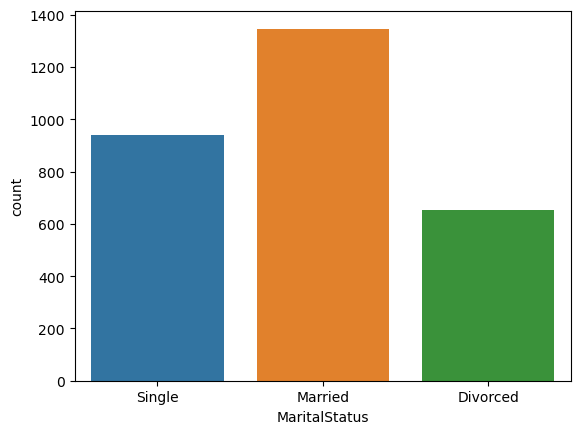

In [ ]:
sns.countplot(x='MaritalStatus',data=data)

# Insights - 

### The analysis reveals that married employees has highest in organization, following closely by the single employees, reflecting a considerable presence within the organization. This insight shows the distribution of employees across different marital status categories, highlighting the diverse composition of the workforce.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

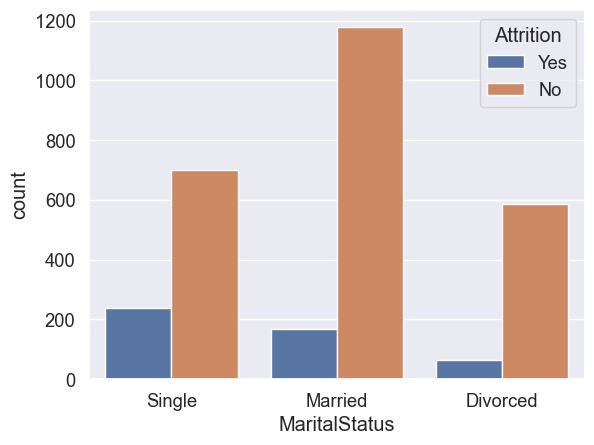

In [ ]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=data)


# Insights - 

### Single employees have a higher attrition rate compared to married and divorced employees, while married employees exhibit the highest retention rate. To keep their employees happy and prevent them from leaving, companies should make sure that single employees feel engaged and satisfied at work. This will help the company keep a stable and reliable team.

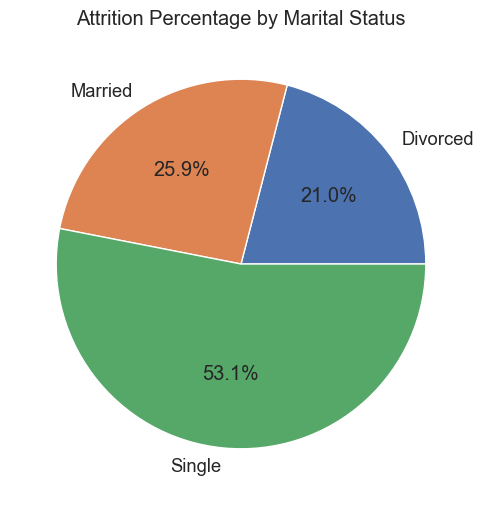

In [ ]:
attr_data=data[data['Attrition']=='Yes']
marital_perc = (attr_data['MaritalStatus'].value_counts() / data['MaritalStatus'].value_counts()) * 100
plt.figure(figsize=(8, 6))
plt.pie(marital_perc, labels=marital_perc.index, autopct='%1.1f%%')
plt.title('Attrition Percentage by Marital Status')
plt.show()

# Insights - 

### Single employees experience the highest attrition rate, with over half of them (53.1%) leaving the company. Married employees have a lower attrition rate of 25.9%, while divorced employees have the lowest attrition rate at 21%. 

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

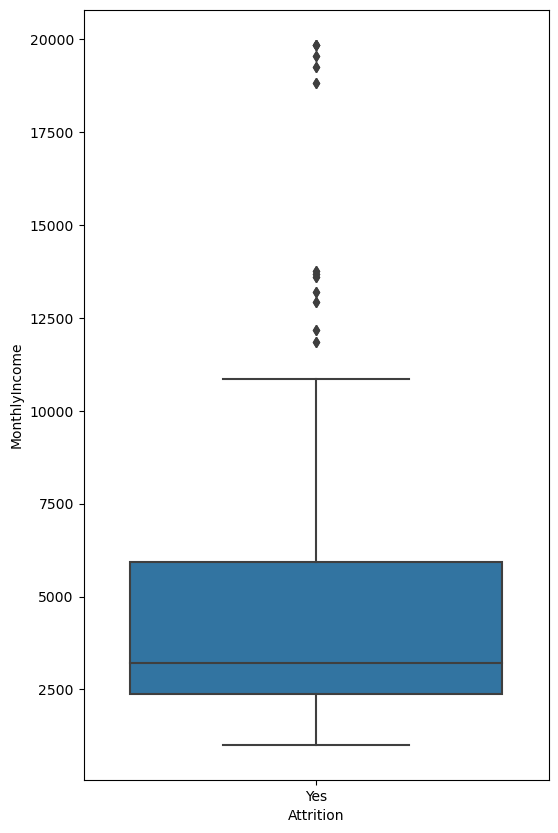

In [ ]:
attr_yes=data[data['Attrition']=='Yes']
plt.figure(figsize=(6, 10))
sns.boxplot(y='MonthlyIncome',x='Attrition',data=attr_yes)

# Insights - 

### The analysis of attrition based on monthly income revealed that employees with a monthly income ranging from 2500 to 6500 had a higher attrition count. Additionally, there were some outliers with higher income levels between 12000 to 14500 and 18000 to 20000.This provides importance towards compensation when addressing attrition and designing strategies to enhance employee retention.

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

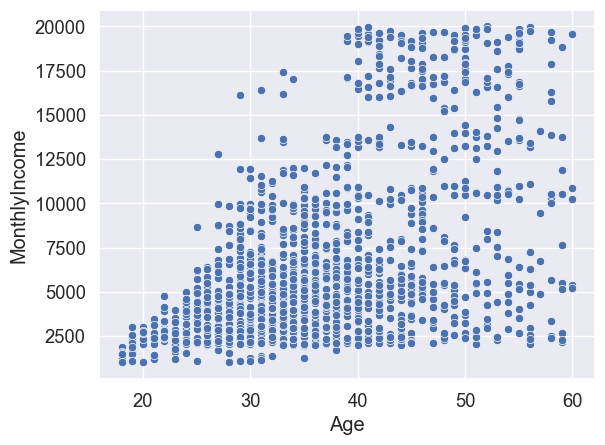

In [ ]:
sns.scatterplot(x='Age',y='MonthlyIncome',data=data)

# Insights - 

### The scatterplot analysis reveals a positive linear relationship between age and monthly income, indicating that as age increases, monthly income tends to increase as well. This finding suggests a potential correlation between experience, career advancement, and income growth. This analysis make the company understand income patterns so that they can build some strategy to support employees professional and financial growth. 

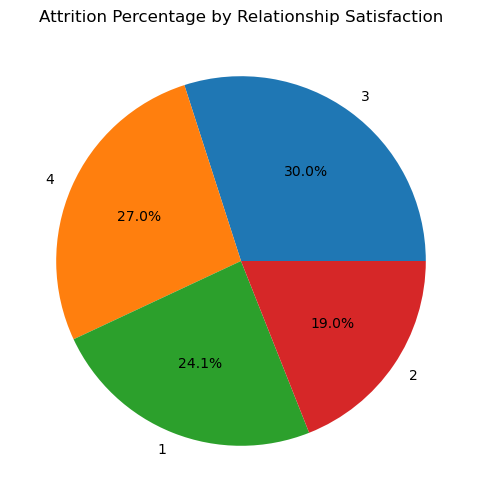

In [ ]:
data_yattr=data[data['Attrition']=='Yes']
data_grp = data_yattr['RelationshipSatisfaction'].value_counts()
attr_per = data_grp / data_grp.sum() * 100
highest_attrition_level = attr_per.idxmax()
plt.figure(figsize=(8, 6))
plt.title("Attrition Percentage by Relationship Satisfaction")
plt.pie(attr_per, labels=attr_per.index, autopct='%1.1f%%')
plt.show()


# Data preprocessingm


#### Label Encoder 

In [ ]:
cat_data=data.select_dtypes(include='object')
for i in cat_data:
    data[i]=sk.preprocessing.LabelEncoder().fit_transform(data[i])


# Insights  -

### In the given code, categorical data columns are selected from the dataset. Then, a LabelEncoder is applied to each column, which assigns a numerical label to each unique category in the column. This process transforms the categorical data into numerical form, allowing it to be used in machine learning algorithms that require numerical inputs.

## Separate both independent and dependent variable

In [ ]:
x=data.drop('Attrition',axis=1).values
y=data['Attrition'].values

# Train-Test Split

In [ ]:
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(x,y,test_size=0.20)

# Decesion Tree 

In [ ]:
train = sk.tree.DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=101,min_samples_leaf=11).fit(x_train,y_train)
train_scr=train.score(x_train,y_train)
test_scr=train.score(x_test,y_test)
print(train_scr)
print(test_scr)

0.8711734693877551
0.8520408163265306


# Insights - 

### The decision tree classifier model achieved a training accuracy of 87% and a testing accuracy of 85%. These accuracy scores indicate the model's ability to predict the target variable accurately, with slightly lower performance on unseen data compared to the training data.

# Grid Search cv

In [ ]:
param_dist = {'max_depth': [11,12,13,14,15,None],
              'min_samples_leaf': [11,12,13,14,15,None],
              'criterion': ['gini']}
search= sk.model_selection.GridSearchCV(train,cv=10,param_grid=param_dist,n_jobs=1).fit(x_train,y_train)
search.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 15}

# grid search cv parameter

In [ ]:
train = sk.tree.DecisionTreeClassifier(criterion='gini',max_depth=11,min_samples_leaf=15).fit(x_train,y_train)
train_scr=train.score(x_train,y_train)
test_scr=train.score(x_test,y_test)
print(train_scr)
print(test_scr)

0.8979591836734694
0.8673469387755102


# Insights - 

### By using grid search CV to optimize the decision tree classifier, the model achieved a training accuracy of approximately 90% and a testing accuracy of around 87%. This improvement of 2% in accuracy highlights the effectiveness of tuning hyperparameters to enhance the model's predictive performance.

# Prediction

In [ ]:
predict = train.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy = sk.metrics.accuracy_score(y_test, predict)
accuracy

0.8673469387755102

# Metrics

In [ ]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

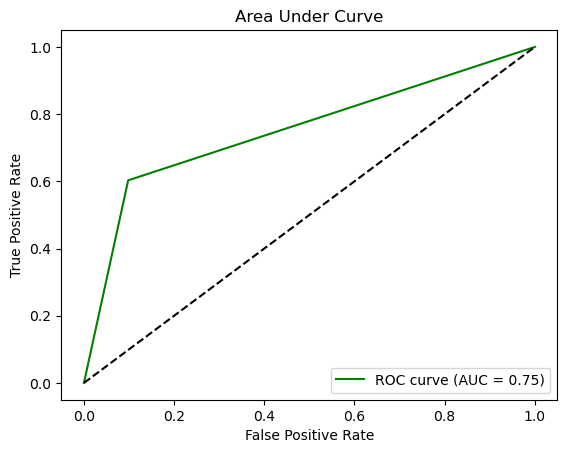

In [ ]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

### The plotted ROC curve has an AUC (Area Under Curve) value of 0.75, indicating moderate predictive performance. 

In [ ]:
con=sk.metrics.confusion_matrix(predict,y_test)
con

array([[469,  51],
       [ 27,  41]], dtype=int64)

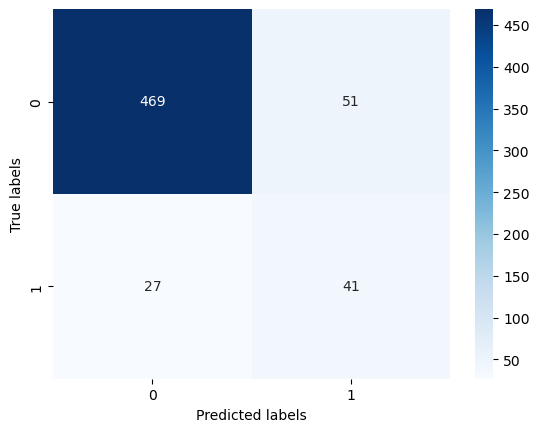

In [ ]:
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Random Forest

#### Separating the dependent and independent Variable

In [ ]:
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(x,y,test_size=0.20)


### Trained the Data

In [ ]:
data_train=sk.ensemble.RandomForestClassifier().fit(x_train,y_train)

### GRID Search CV 

In [ ]:
param_dist = {'max_depth': [19,21,23,25],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini']
             }
search= sk.model_selection.GridSearchCV(data_train,cv=10,param_grid=param_dist,n_jobs=1).fit(x_train,y_train)
search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto'}

### OOB Error Rate 

In [ ]:
oob_error_rates = []
for i in range(100,1000+1):
    data_train=sk.ensemble.RandomForestClassifier(n_estimators=i,oob_score=True,warm_start=True,random_state=42).fit(x_train,y_train)
    oob_error = 1 - data_train.oob_score_
    oob_error_rates.append(oob_error)

In [ ]:
oob_series=pd.Series(oob_error_rates)


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 10 to 500 trees)')

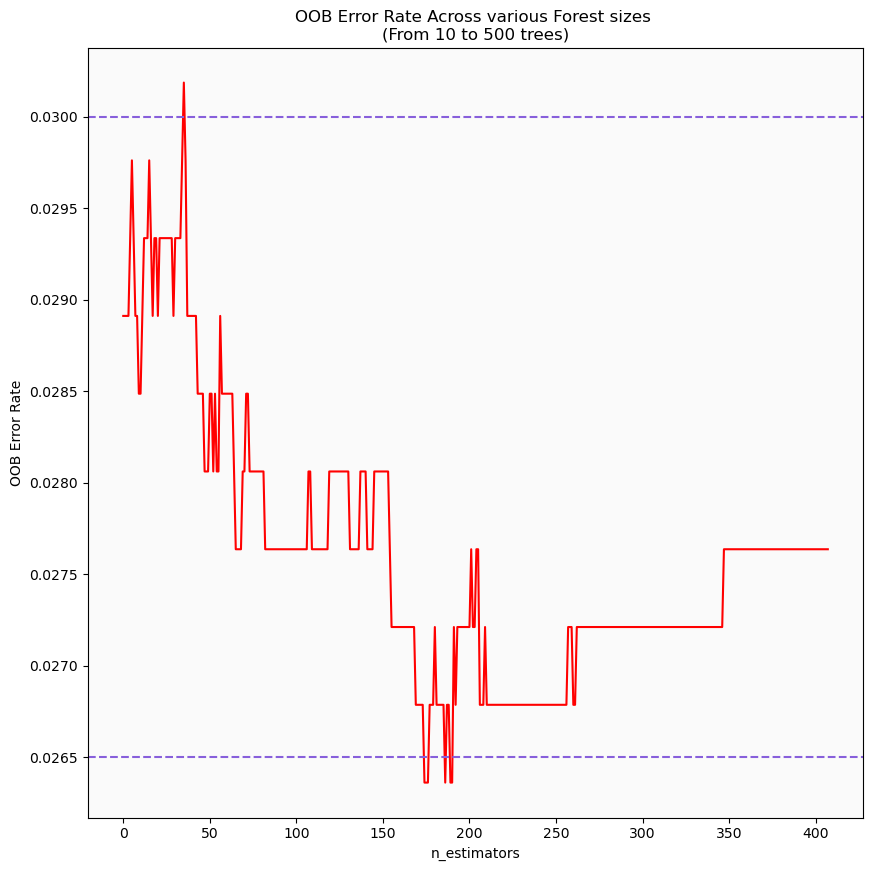

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.030, color='#875FDB',linestyle='--')
plt.axhline(0.0265, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 10 to 500 trees)')

# Insights -

### The OOB (Out-of-Bag) error rate remains stable at around 200 estimators, indicating that increasing the number of trees beyond this point does not significantly improve the model's performance. This suggests that a forest size of 200 would be sufficient for achieving optimal results in this scenario.

In [ ]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[210]))

OOB Error rate for 400 trees is: 0.02679


In [ ]:
data_train=sk.ensemble.RandomForestClassifier(n_estimators=210,criterion='gini',max_depth=19,bootstrap=True,max_features='auto').fit(x_train,y_train)
train_acc = data_train.score(x_train, y_train)
print('train_acc = ', train_acc)
test_acc=data_train.score(x_test, y_test)
print('test_acc = ', test_acc)

train_acc =  1.0
test_acc =  0.9761904761904762


# Insights - 

### By using the Random Forest model algorithm, the training accuracy increased to 100% and the testing accuracy improved to 97%, surpassing the performance of the Decision Tree algorithm. This indicates that the Random Forest model is robust in capturing the underlying patterns and making accurate predictions.

# Accuracy

In [ ]:
accuracy=data_train.score(x_test, y_test)
print(accuracy)

0.9761904761904762


# Predictions

In [ ]:
predict=data_train.predict(x_test)
print(predict)

[0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 

# Performance Matrics

In [ ]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

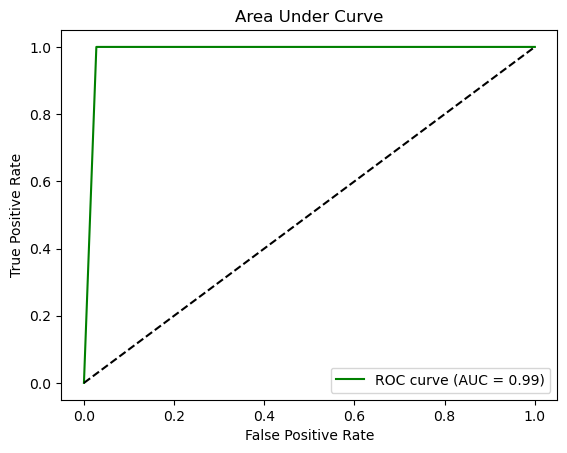

In [ ]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

# Insights -

### The plotted ROC curve shows a high level of performance with an AUC value of 0.99. This indicates that the model has a strong ability to distinguish between positive and negative classes, resulting in accurate predictions.

In [ ]:
confusion=sk.metrics.confusion_matrix(predict,y_test)
print(confusion)

[[495  14]
 [  0  79]]


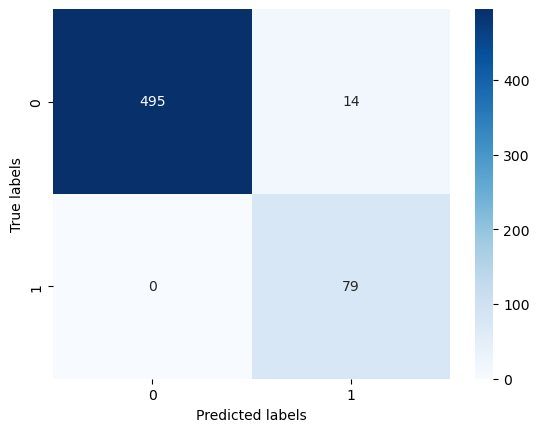

In [ ]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Feature

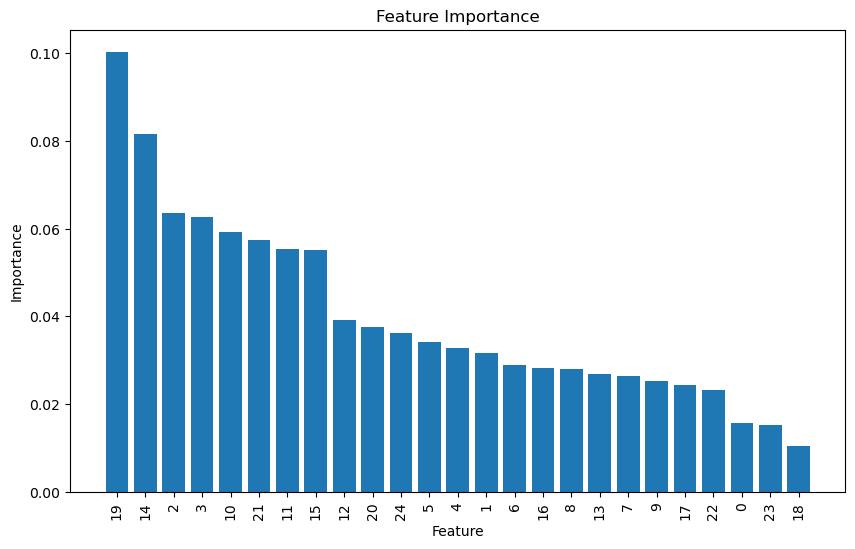

In [ ]:
importances = data_train.feature_importances_

# Get feature names
feature_names = np.argsort(importances)[::-1] 

# Check if the length of feature_names matches the number of features
if len(feature_names) != len(importances):
    raise ValueError("Number of feature names does not match the number of features")

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Naive Bayes 

In [ ]:
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(x,y,test_size=0.20)

In [ ]:
train_data_naive= sk.naive_bayes.MultinomialNB().fit(x_train,y_train)

In [ ]:
prediction=train_data_naive.predict(x_test)
print(prediction)

[0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0
 0 1 1 1 0 0 1 1 0 0 1 0 

In [ ]:
confusion_mat=sk.metrics.confusion_matrix(predict,y_test)
print(confusion_mat)

[[407 102]
 [ 68  11]]


In [ ]:
accuracy=train_data_naive.score(x_test, y_test)
print(accuracy)

0.5408163265306123


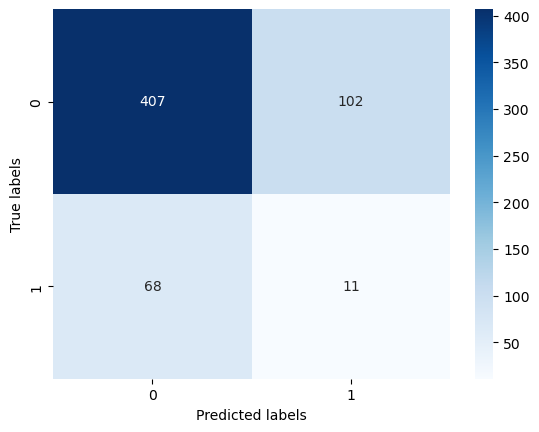

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Overall Insights Summary - 

### Based on the analysis of the HR employee attrition data, here is a summary of the insights:

1. Attrition by Department: The Sales department has the highest attrition rate (38.5%), followed by the HR department (35.6%).

2. Work-Life Balance: Employees in the R&D department have the highest rating (3) for work-life balance, followed by the Sales department.

3. Education Field: The Life Sciences field is most prevalent in the R&D department, followed by Medical and Marketing. The Sales department primarily consists of employees from the Life Sciences and Medical fields.

4. Age and Attrition: The majority of attrition occurs within the age group of 25-35, highlighting the importance of addressing factors like career growth, job satisfaction, and work-life balance for employees in this age range.

5. Gender and Attrition: Male employees show higher attrition between the ages of 26-40, while female employees exhibit attrition between 26-36, with some outliers between 51-58.

6. Overtime and Attrition: Employees who work overtime have a higher attrition count compared to those who do not, indicating the need to address workload and work-life balance to reduce attrition.

7. Job Role and Attrition: The Lab Technician job role has the highest attrition rate (26.2%), followed by Sales Executives (24.2%). Research Directors have the lowest attrition, with moderate attrition seen in Manager, Healthcare Representative, and Manufacturing Director roles.

8. Marital Status and Attrition: Single employees have the highest attrition rate, while married employees show the highest retention. Divorced employees have the lowest attrition rate.

9. Monthly Income and Attrition: Employees with monthly incomes between 2500 and 6500 exhibit higher attrition rates, with some outliers in the income ranges of 12000-14500 and 18000-20000.

10. Age and Monthly Income: There is a positive linear relationship between age and monthly income, indicating that as age increases, so does monthly income.

11. Area Under the Curve:  The AUC for the ROC curve. The ROC curve demonstrated a high AUC value of 0.99, indicating a strong predictive performance of the model in distinguishing between positive and negative outcomes.

12. Model Performance: Decision Tree and Random Forest algorithms were applied, resulting in improved accuracy compared to the baseline model. The Random Forest model achieved a training accuracy of 100% and a testing accuracy of 97%, outperforming the Decision Tree model.